# Author : Anurag

# GRIP - THE SPARK FOUNDATION

# Decision Tree Classification on the Iris Dataset

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

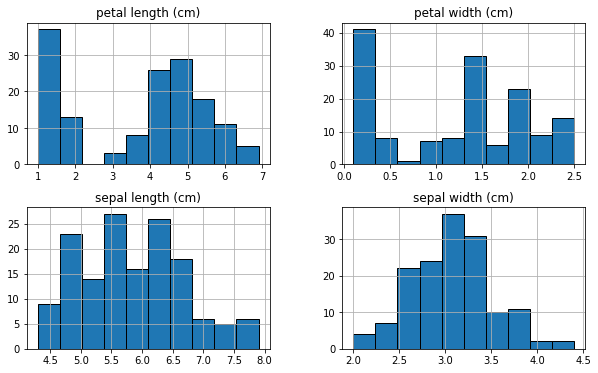

In [6]:
df.hist(edgecolor='black',figsize=(10,6))
plt.show()

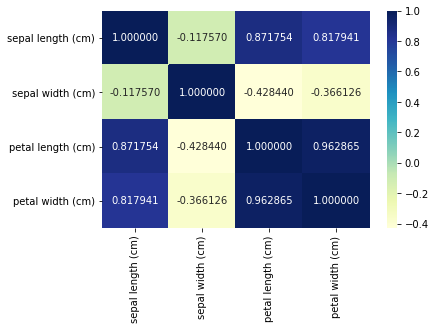

In [7]:
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='YlGnBu')
plt.show()

## Modeling

In [8]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,[0,1,2,3]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Finding Optimum Depth Value

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

lvls=10
mean=np.zeros((lvls-1))

for i in range(1,lvls):
  t=DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(x_train,y_train)
  y_hat=t.predict(x_test)
  mean[i-1]=accuracy_score(y_test,y_hat)

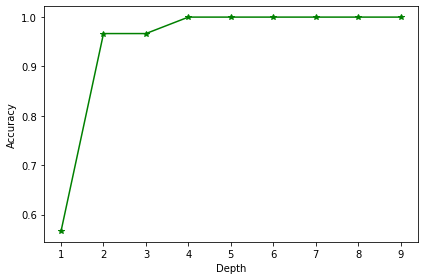

In [12]:
plt.plot(range(1,lvls),mean,'g',marker='*')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [13]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model Evaluation

In [14]:
y_pre=dtree.predict(x_test)
y_pre_train=dtree.predict(x_train)
print("DecisionTrees's Training Accuracy: %.2f"%accuracy_score(y_train,y_pre_train))
print("DecisionTrees's Testing Accuracy: ", accuracy_score(y_test,y_pre))

DecisionTrees's Training Accuracy: 0.99
DecisionTrees's Testing Accuracy:  1.0


## Visualizing the Results

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


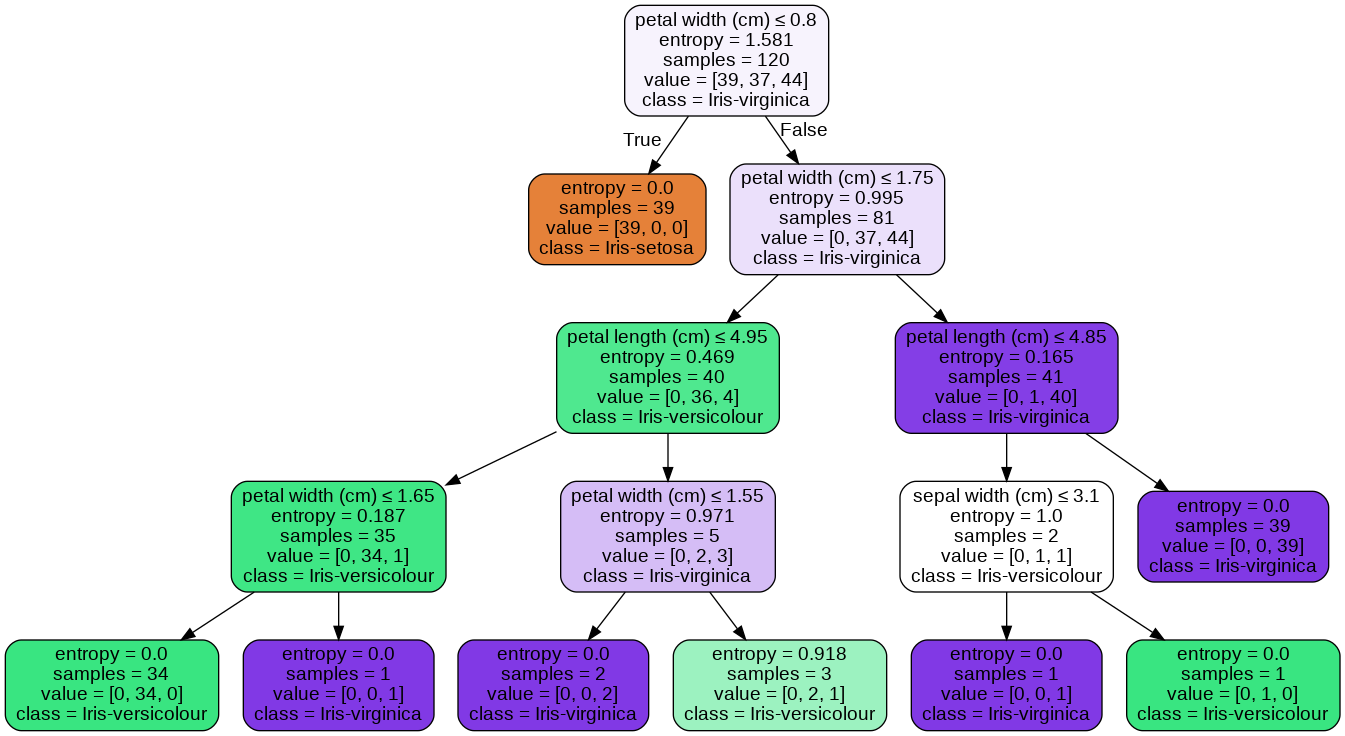

In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=iris.feature_names,class_names= ['Iris-setosa','Iris-versicolour','Iris-virginica'],filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())